In [251]:
import numpy as np
import scipy as sy
from scipy import interpolate as ip
import matplotlib.pyplot as plt
import pandas as pd

## Question 1

In [16]:
A = 130e-6 # m
sigma_max = 345e6
E = 103e9
l0 = 76 # mm 

# part a
F_max = A * sigma_max * 1e-3

# part b
l_max = l0 + l0 * sigma_max / E

print(f"F_max {F_max} kN\nL_max: {l_max} mm")

F_max 44.849999999999994 kN
L_max: 76.25456310679611 mm


In [3]:
(130 / np.pi)**(1/2)

6.432750982580687

## Question 2

In [74]:
# parameters
l = 120e-3
D = 15.0e-3
f_max = 35e3
dstrain = -1.2e-5

# data
d2 = {
    "Al": {"E": 70e9, "S": 250e6, "PS": 0.33},
    "Ti": {"E": 105e9, "S": 850e6, "PS": 0.36},
    "St": {"E": 205e9, "S": 550e6, "PS": 0.27},
    "Mg": {"E": 45e9, "S": 170e6, "PS": 0.35}
}

# functions
def max_force(S): return S * np.pi / 4 * D**2
def max_D(S, E): 
    l_max = l + S * l / E
    D_max = D * (l / l_max)**(1/2)
    return l_max, D_max

for mat in d2:
    E = d2[mat]["E"]
    S = d2[mat]["S"]
    PS = d2[mat]["PS"]
    
    # calculated values
    ## force
    F_max = max_force(S)
    d2[mat]["Fma1x"] = F_max * 1e-3
    d2[mat]["req1"] = F_max > f_max
    
    ## diameter reduction
    strainx = dstrain / D
    strainz = - strainx / PS

    stress = strainz * E
    Force = stress * np.pi / 4 * D**2

    d2[mat]["Fmax2"] = Force * 1e-3
    d2[mat]["req2"] = Force > f_max

df2 = pd.DataFrame(d2)
df2

,Al,Ti,St,Mg
E,70000000000.0,105000000000.0,205000000000.0,45000000000.0
S,250000000.0,850000000.0,550000000.0,170000000.0
PS,0.33,0.36,0.27,0.35
Fma1x,44.178647,150.207399,97.193023,30.04148
req1,True,True,True,False
Fmax2,29.98793,41.233404,107.337749,18.176357
req2,False,True,True,False


## Question 3

In [96]:
E = 1000e6 / 0.005
l0 = 500e-3
F = 140e3
D = 10e-3

A = np.pi * D**2 / 4

# calcs
dl = F * l0 / E / A
l = l0 - dl

percent_elong = (l - l0) / l0

print(f"E: {E * 1e-9} GPa\ndl: {dl * 1000} mm\nl: {l * 1000} mm\n% elong: {percent_elong * 100}")

E: 200.0 GPa
dl: 4.456338406573069 mm
l: 495.5436615934269 mm
% elong: -0.8912676813146114


## Question 4

In [327]:
# Parameters
d0 = 12.8e-3
l0 = 50.8e-3

# data
N = [0, 12.7, 25.4, 38.1, 50.8,
     76.2, 89.1, 92.7, 102.5, 107.8,
     119.4, 128.3, 149.7, 159, 160.4,
     159.5, 151.5, 124.7]

L = [50.8, 50.825, 50.851, 50.876, 50.902,
     50.952, 51.003, 51.054, 51.181, 51.308,
     51.562, 51.816, 52.832, 53.848, 54.356,
     54.864, 55.880, 56.642]

## arrays
N = np.array(N) * 1000
L = np.array(L) / 1000

### part a

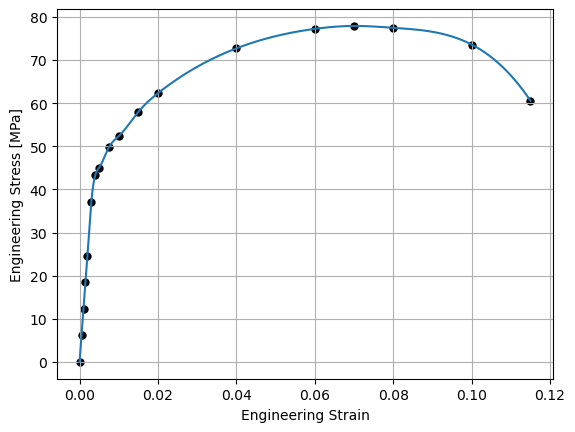

In [332]:
estress = N / np.pi / 4 / d0**2
estrain = (L - l0) / l0

istress = ip.CubicSpline(estrain, estress)
istrain = np.linspace(0, estrain[-1], 100000)

plt.scatter(estrain, estress * 1e-6, color="k", lw=1e-5)
plt.plot(istrain, istress(istrain) * 1e-6)
plt.grid("both")
plt.xlabel("Engineering Strain")
plt.ylabel("Engineering Stress [MPa]")
plt.savefig("hw5q4a.png", dpi=600)
plt.show()

### part b

In [318]:
E = (estress[5] / estrain[5]) * 1e-9

print(f"E: {E} GPa")

E: 12.369304827860898 GPa


### part c

0.02% Offset YS: 41.35853521742676 MPa


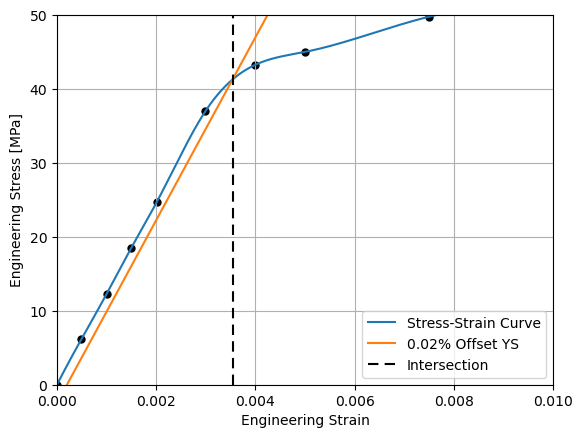

In [319]:
# assume slope of E and use 0.02% offset YS
def ys_func(x): return E * x * 1e3 - 0.02 / 100 * E * 1e3

stop = 5000
ys = ys_func(istrain[:stop])

ys_02offset = 1e-6 * float(istress(0.00355))
print(f"0.02% Offset YS: {ys_02offset} MPa")

plt.scatter(estrain, estress * 1e-6, color="k", lw=1e-5)
plt.plot(istrain, istress(istrain) * 1e-6, label="Stress-Strain Curve")
plt.plot(istrain[:stop], ys, label="0.02% Offset YS")
plt.axvline(0.00355, label = "Intersection", c="k", ls=(0,(5,3)))

plt.grid("both"), plt.xlim(0, 0.01), plt.ylim(0,50)
plt.xlabel("Engineering Strain"), plt.ylabel("Engineering Stress [MPa]")
plt.legend()
plt.savefig("hw5q4c.png", dpi=600)
plt.show()

### part d,e,f

In [320]:
# part d
ts = np.max(istress(istrain)) * 1e-6

# part e
p_elong = estrain[-1] * 100

# part f
res_mod = sy.integrate.nquad(istress, [[0, estrain[-1]]])[0]

### part g

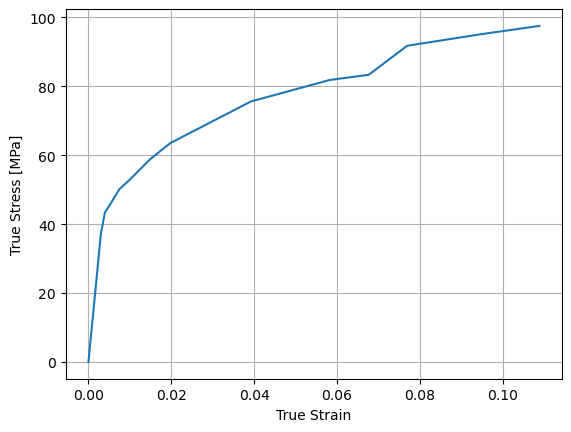

In [398]:
temp_estress = N[-3:] / np.pi / 4 / [12.22e-3**2, 11.80e-3**2, 10.65e-3**2]

estress[-3] = temp_estress[0]
estress[-2] = temp_estress[1]
estress[-1] = temp_estress[2]

tstress = estress * (1 + estrain)
tstrain = np.log(1 + estrain)

# plotting
plt.plot(tstrain, tstress * 1e-6)
plt.grid("both")
plt.xlabel("True Strain")
plt.ylabel("True Stress [MPa]")
plt.savefig("hw5q4g.png", dpi=600)
plt.show()

### part h

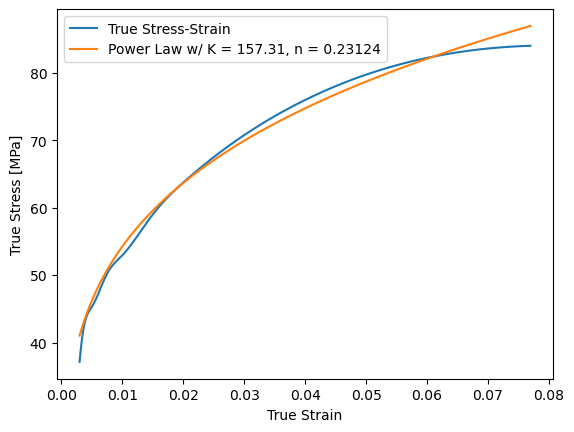

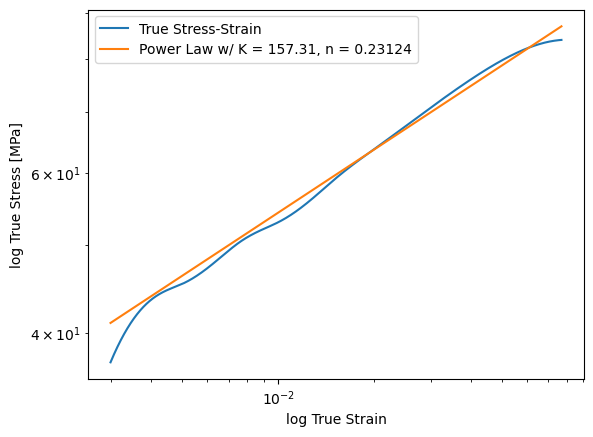

In [397]:
g_interp = ip.CubicSpline(tstrain[5:-3], tstress[5:-3])
g_strain = np.linspace(tstrain[5], tstrain[-3], 100000)
g_stress = g_interp(g_strain) * 1e-6

def curve_fit(x, K, n): return K * x**n

a, b = sy.optimize.curve_fit(curve_fit, g_strain, g_stress)
K, n = a

plt.plot(g_strain, g_stress, label="True Stress-Strain")
plt.plot(g_strain, curve_fit(g_strain, K, n), label=f"Power Law w/ K = {round(K,2)}, n = {round(n,5)}")
plt.legend()
plt.xlabel("True Strain")
plt.ylabel("True Stress [MPa]")
plt.savefig("hw5q4h.png", dpi=600)
plt.show()

plt.loglog(g_strain, g_stress, label="True Stress-Strain")
plt.loglog(g_strain, curve_fit(g_strain, K, n), label=f"Power Law w/ K = {round(K,2)}, n = {round(n,5)}")
plt.legend()
plt.xlabel("log True Strain")
plt.ylabel("log True Stress [MPa]")
plt.savefig("hw5q4h-loglog.png", dpi=600)
plt.show()

In [393]:
print(f"E: {E} GPa\n0.02% Offset YS: {ys_02offset} MPa\nTensile Strength: {ts} MPa\nPercent Elongation: {p_elong} %\nModulus of Resilience: {res_mod * 1e-6}\nK = {K}, n = {n}")

E: 12.369304827860898 GPa
0.02% Offset YS: 41.35853521742676 MPa
Tensile Strength: 77.9071370720215 MPa
Percent Elongation: 11.500000000000014 %
Modulus of Resilience: 7.934484802404123
K = 157.3138973852595, n = 0.23124405882052976
